In [1]:
#install ucirepo library 
# pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
spambase = fetch_ucirepo(id=94)

# Data as pandas DataFrames
x = spambase.data.features
y = spambase.data.targets

np.ravel(y)


array([1, 1, 1, ..., 0, 0, 0], shape=(4601,))

In [4]:
x.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
x.shape

(4601, 57)

In [6]:
y
# 1 is spam and 0 is not spam


,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [7]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, np.ravel(y), test_size=0.2, random_state=42)

In [8]:
# Standardization
scalar = StandardScaler()
x_train_Scaled = scalar.fit_transform(x_train)
x_test_Scaled = scalar.transform(x_test)

## Model training and evaluation

Logistic Regression

In [9]:
logistic_reg = LogisticRegression()

logistic_reg.fit(x_train, y_train)  # withpout scaling
y_pred_logistic = logistic_reg.predict(x_test)

logistic_reg_accuracy = accuracy_score(y_test, y_pred_logistic)

print("accuracy of Logistic Regression without scaling: ", logistic_reg_accuracy*100, "%")
print(classification_report(y_test, y_pred_logistic))

accuracy of Logistic Regression without scaling:  92.61672095548317 %
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.91      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



Precision - Out of 100 mails classified as spam(1), 92 are actually spam.
Recall - out of 100 spam mails, 91 are classified in spam.
F1 score is harmonic mean fo Precisiona and recall

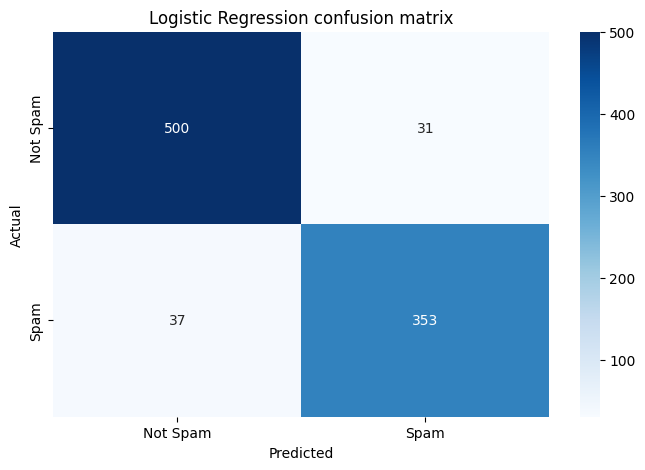

In [10]:
logistic_reg_cm = confusion_matrix(y_test, y_pred_logistic)

#plot

plt.figure(figsize=(8,5))
sns.heatmap(logistic_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Logistic Regression confusion matrix')
plt.show()

Recall #out of 531(spam and not spam) test samples, 500 are correctly classified
Precision # out of 537 samples, Actual 500 values are not spam and 37 are spam. 
same for 384 values, 353 are actually spam and 31 values not spam, classified as spam.

Actual Spam value should be more and actual not spam as predicted spam should be less(31)

In [11]:
logistic_reg = LogisticRegression()

logistic_reg.fit(x_train_Scaled, y_train)  # with scaling
y_pred_logistic = logistic_reg.predict(x_test_Scaled)

logistic_reg_accuracy = accuracy_score(y_test, y_pred_logistic)

print("accuracy of Logistic Regression without scaling: ", logistic_reg_accuracy*100, "%")
print(classification_report(y_test, y_pred_logistic))

accuracy of Logistic Regression without scaling:  91.96525515743757 %
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



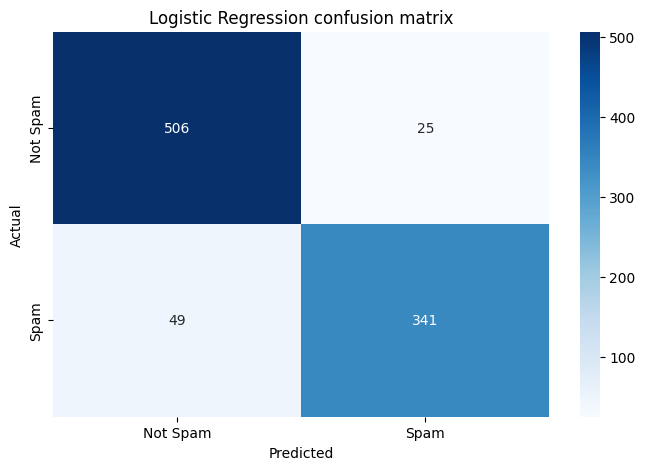

In [12]:
logistic_reg_cm = confusion_matrix(y_test, y_pred_logistic)

#plot

plt.figure(figsize=(8,5))
sns.heatmap(logistic_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Logistic Regression confusion matrix')
plt.show()

# KNN - K-Nearest Neighbours

In [13]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)  

y_pred_knn = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("K-Neighbors Accuracy: ", knn_accuracy, "%")
print(classification_report(y_test, y_pred_knn))

K-Neighbors Accuracy:  0.7785016286644951 %
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       531
           1       0.85      0.58      0.69       390

    accuracy                           0.78       921
   macro avg       0.80      0.75      0.76       921
weighted avg       0.79      0.78      0.77       921



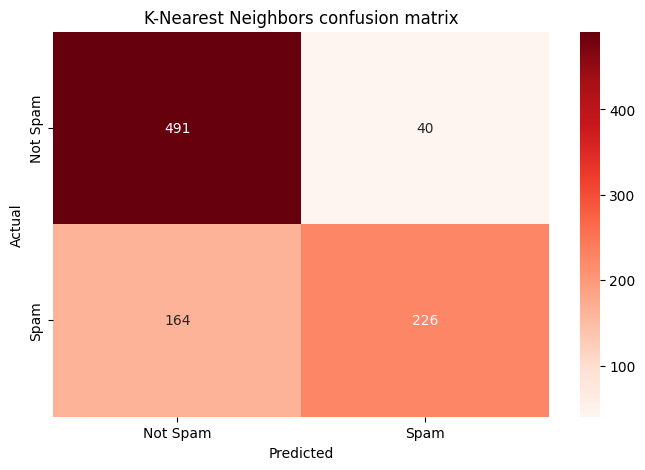

In [14]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('K-Nearest Neighbors confusion matrix')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_Scaled, y_train)  # with scaled values - standardized

y_pred_knn = knn.predict(x_test_Scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("K-Neighbors Accuracy: ", knn_accuracy, "%")
print(classification_report(y_test, y_pred_knn))

K-Neighbors Accuracy:  0.8783930510314875 %
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       531
           1       0.93      0.77      0.84       390

    accuracy                           0.88       921
   macro avg       0.89      0.86      0.87       921
weighted avg       0.88      0.88      0.88       921



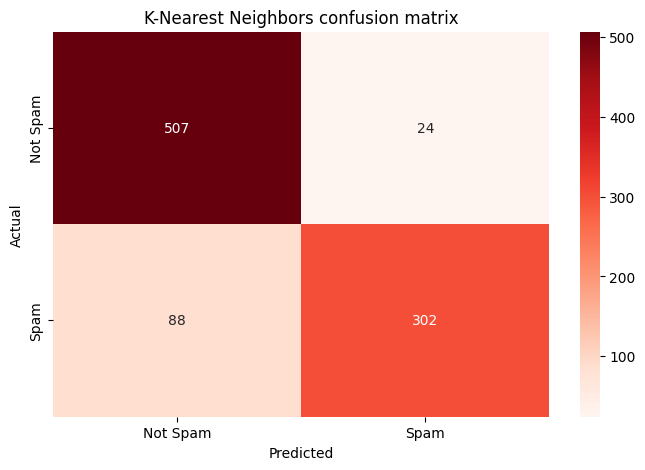

In [16]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('K-Nearest Neighbors confusion matrix')
plt.show()

# Support Vector Machine

In [17]:
svm = SVC()
svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Accuracy: ", svm_accuracy*100, "%")
print(classification_report(y_test, svm_pred))

SVM Accuracy:  66.23235613463626 %
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       531
           1       0.66      0.42      0.51       390

    accuracy                           0.66       921
   macro avg       0.66      0.63      0.63       921
weighted avg       0.66      0.66      0.64       921



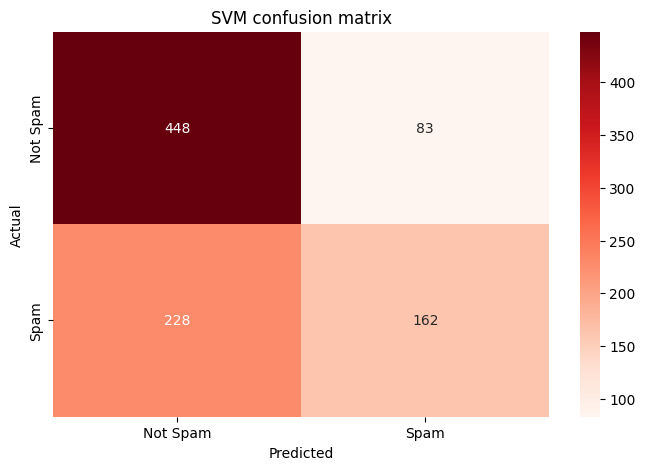

In [18]:
svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(8,5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('SVM confusion matrix')
plt.show()

In [19]:
svm = SVC()
svm.fit(x_train_Scaled, y_train)

svm_pred = svm.predict(x_test_Scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Accuracy: ", svm_accuracy*100, "%")
print(classification_report(y_test, svm_pred))

SVM Accuracy:  93.48534201954396 %
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



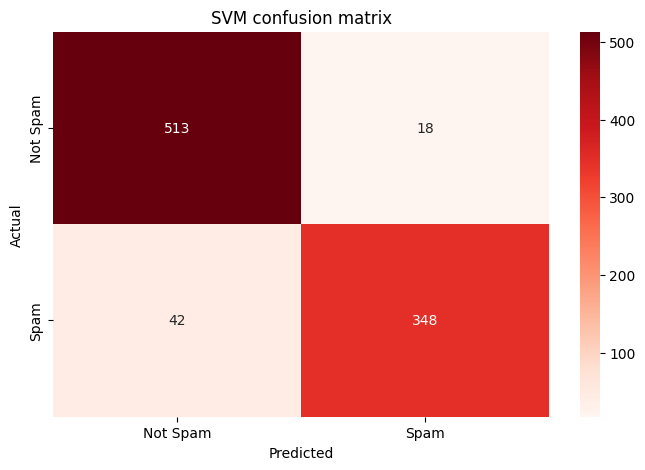

In [20]:
svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(8,5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('SVM confusion matrix')
plt.show()

# Decision Tree

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

dt_pred = decision_tree.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:",dt_accuracy*100, "%")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 90.33659066232356 %
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       531
           1       0.90      0.87      0.88       390

    accuracy                           0.90       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



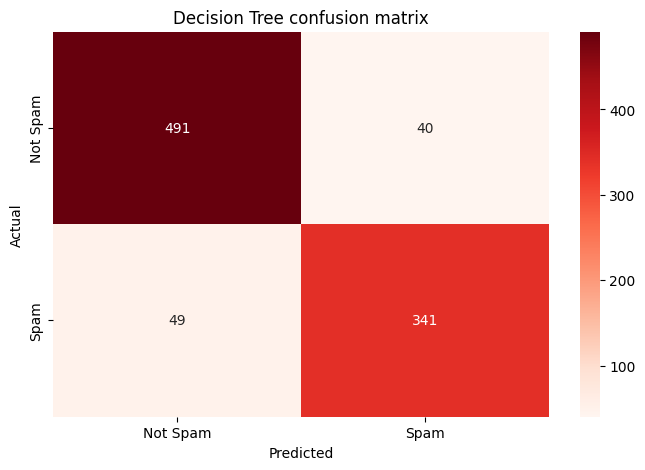

In [22]:
decision_tree_cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8,5))
sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Decision Tree confusion matrix')
plt.show()

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_Scaled, y_train)

dt_pred = decision_tree.predict(x_test_Scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:",dt_accuracy*100, "%")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 91.42236699239956 %
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921



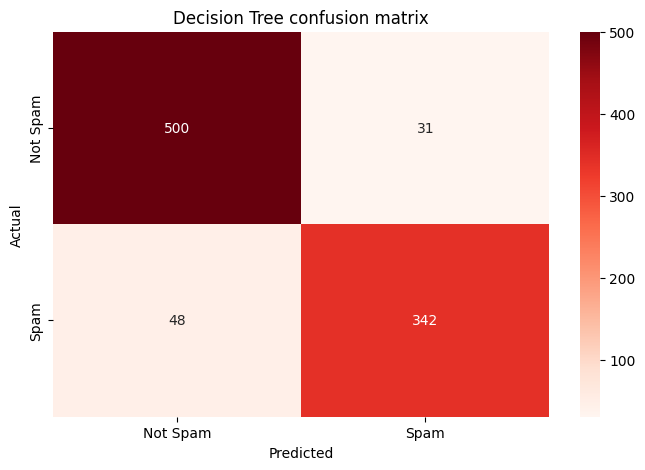

In [24]:
decision_tree_cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8,5))
sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Decision Tree confusion matrix')
plt.show()

# Random Forest Classifier

In [25]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy*100, "%")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 95.54831704668838 %
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.97      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921



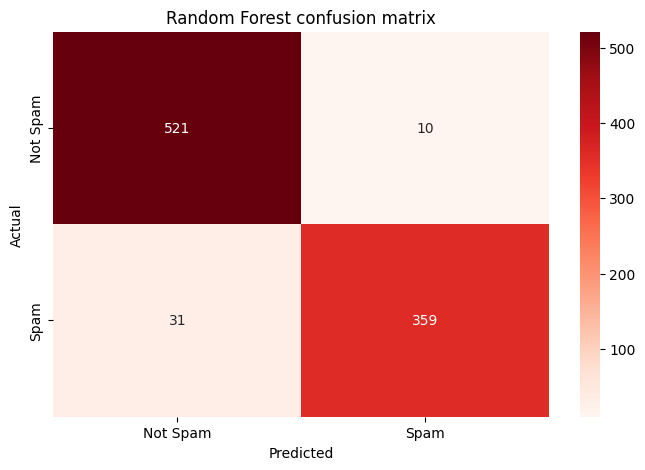

In [26]:
random_forest_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8,5))
sns.heatmap(random_forest_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Random Forest confusion matrix')
plt.show()

In [27]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train_Scaled, y_train)
rf_pred = random_forest.predict(x_test_Scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy*100, "%")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 95.87404994571118 %
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



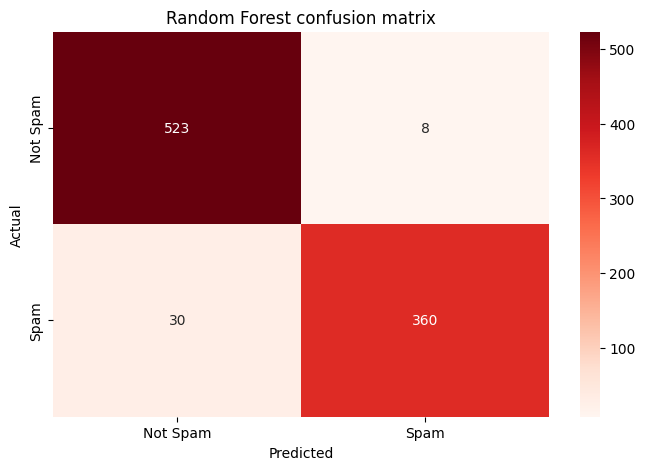

In [28]:
random_forest_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8,5))
sns.heatmap(random_forest_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted') 
plt.title('Random Forest confusion matrix')
plt.show()

# Without scaling, Random forest performs better, we will keep it as final accurate model

# Lets create graph fo accuracy of each model and compare them


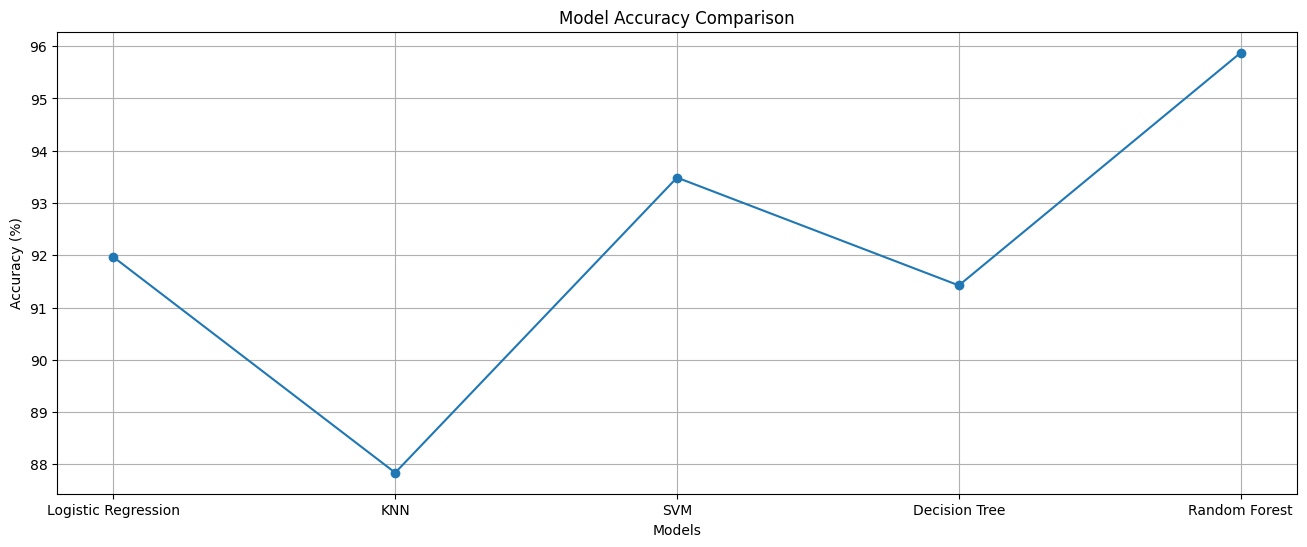

In [29]:

model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [logistic_reg_accuracy*100, knn_accuracy*100, svm_accuracy*100, dt_accuracy*100, rf_accuracy*100]

plt.figure(figsize=(16,6))
plt.plot(model_names,accuracy, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.grid()
plt.show()

In [33]:
# Structure of a Confusion Matrix

# #	                   Predicted Positive	  Predicted Negative
# # Actual Positive	  True Positive (TP)	  False Negative (FN)
# # Actual Negative	  False Positive (FP)	  True Negative (TN)

# Explanation

# TP (True Positive): Model correctly predicted the positive class.

# TN (True Negative): Model correctly predicted the negative class.

# FP (False Positive): Model predicted positive, but it was actually negative.

# FN (False Negative): Model predicted negative, but it was actually positive.

#  Common Metrics Derived From It

# From the confusion matrix, you can calculate:

# Accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision = TP / (TP + FP)

# Recall (Sensitivity) = TP / (TP + FN)

# F1 Score = 2 × (Precision × Recall) / (Precision + Recall)

## Comparison for False positive Rate


In [40]:
confusion_matrices = [logistic_reg_cm, knn_cm, svm_cm, decision_tree_cm, random_forest_cm]
false_positive_rate = []

for cm in confusion_matrices:
    false_positive_rates = cm[0,1]/ (cm[0,1] + cm[0,0]) # tp/tp+FP

    false_positive_rate.append(false_positive_rates*100)

false_positive_rate

[np.float64(4.708097928436912),
 np.float64(4.519774011299435),
 np.float64(3.389830508474576),
 np.float64(5.83804143126177),
 np.float64(1.5065913370998116)]

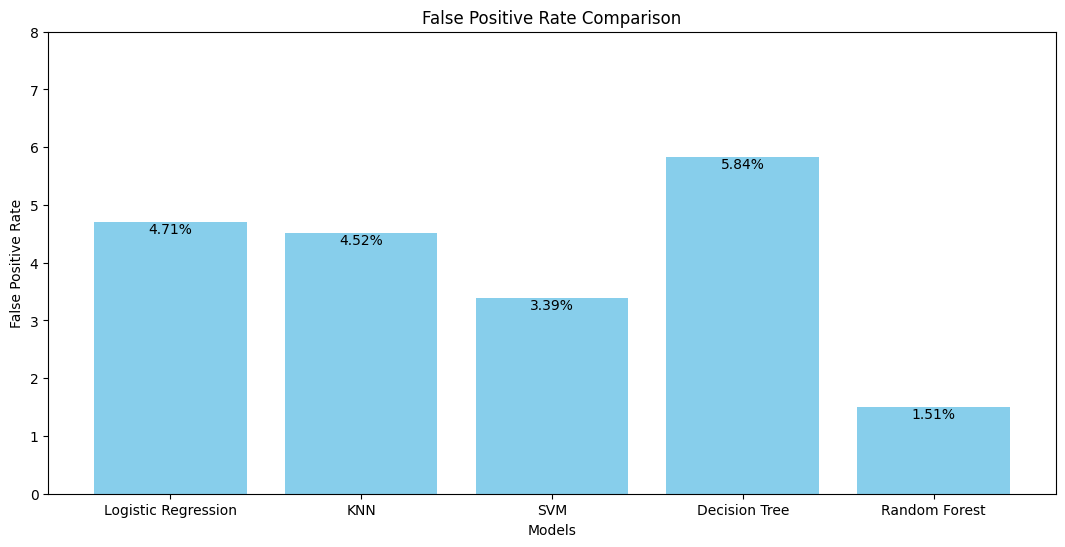

In [51]:
# plotting the FPR rates

plt.figure(figsize=(13,6))
plt.bar(model_names, false_positive_rate, color='skyblue')
plt.xlabel('Models')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate Comparison')
plt.ylim(0,8)

for x in zip(model_names, false_positive_rate):
    plt.text(x[0], x[1]-0.2, str(round(x[1],2))+'%', ha='center', fontsize=10)

plt.show()

In [ ]:
# Least FPR is best model here in case is random forest with 1.51% FPR
# Decision tree has highest FPR of 7.63% making it the worst model in this case
#for tabular models, most of cases SVM or Random Forest give the best results.
# always try to start with Log reg and then go for complex models.
#for image, SVM not much effective 

#for scaling, Log Reg, KNN and SVM models are good but Decision tree and Random forest not much affected by scaling.